### DİYABET 

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset sitesinden alınan veri seti hakkında yazan bilgiler.

-Bu veri kümesi aslen Ulusal Diyabet ve Sindirim ve Böbrek Enstitüsü'nden alınmıştır.
Hastalıklar. Veri setinin amacı, bir hastanın diyabet hastası olup olmadığını tanısal olarak tahmin etmektir,
veri setinde yer alan belirli tanısal ölçümlere dayanmaktadır. Çeşitli kısıtlamalar getirilmiştir
Bu örneklerin daha büyük bir veritabanından seçilmesi üzerine. Özellikle, buradaki tüm hastalar kadındır.
En az 21 yaşında Pima Kızılderili kökenli.2
(.csv) Dosyasındaki veri setinden, bazıları bağımsız olan çeşitli değişkenler bulabiliriz
(birkaç tıbbi öngörücü değişken) ve yalnızca bir hedef bağımlı değişken.

Ben elimde bulunan veri setini inceleyerek ve görselleştirerek daha açıklayıcı hale getirmek istiyorum. Veri setinde gözlemlerin isimleri;

- Pregnancies = Hamile olanlar
- Glucose = Glikoz
- BloodPressure = Kan basıncı
- SkinThickness = Deri kalınlığı
- Insulin = İnsulin
- BMI = Vücut kitle indeksi
- DiabetesPedigreeFunction = Diyabet yüzdesi
- Age = Yaş                      
- Outcome = Sonuç

In [1]:
#En başta kullanacağımız kütüphaneleri import ediyorum.
import pandas as pd
import numpy as np

In [2]:
#veri setimizi okuyalım.
df = pd.read_csv("diabetes.csv")

In [3]:
#veri seti hakkında bilgiler;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#veri setinin betimlenmesi
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
#aykırı gözlem veya eksik değer var mı diye bakma;
df.isnull().values.any()

False

Cevap False çıktı. Bunun anlamı eksik değer veya aykırı gözlem yoktur anlamına gelmektedir.

In [65]:
#Hnagi değişkende kaç tane eksik gözlem var?
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#girilen değişken arasında kaç tane sınıf var sorusunu sorar?
df["Insulin"].value_counts().count()

186

In [13]:
#frkeansı verir.
df["Insulin"].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

<AxesSubplot: >

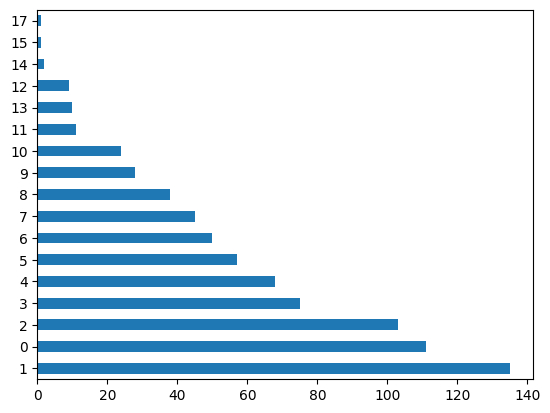

In [18]:
#sütun grafiği çizelim;
df["Pregnancies"].value_counts().plot.barh()

**Not:** Eğer barh komutu sonunda ; olmazsa grafik bilgileri gösterilir.

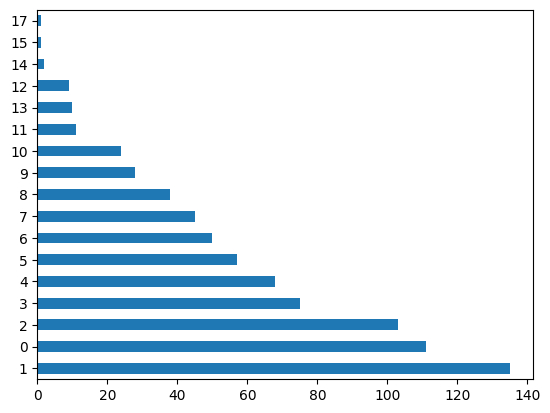

In [19]:
#; kullanılmış hali;
df["Pregnancies"].value_counts().plot.barh();

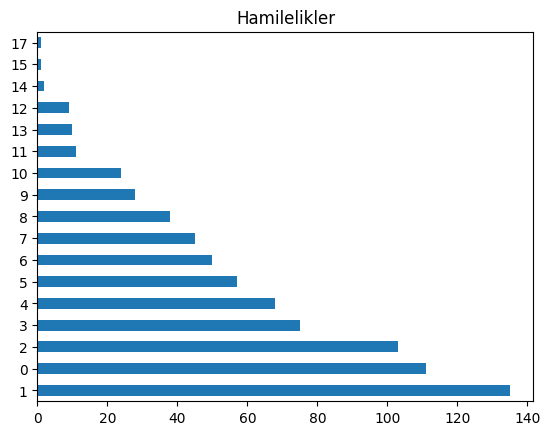

In [21]:
# sütun grafiğine başlık eklemmek istersek;
df["Pregnancies"].value_counts().plot.barh().set(title="Hamilelikler");

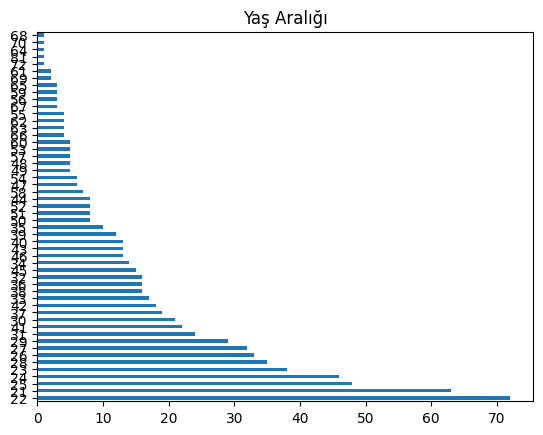

In [22]:
# yaş değişkenini inceleylim;
df["Age"].value_counts().plot.barh().set(title="Yaş Aralığı");

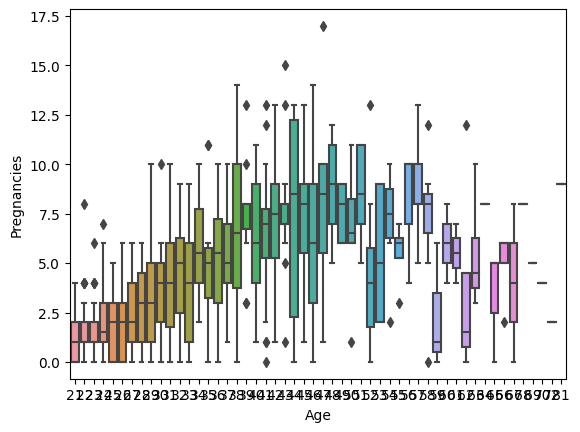

In [23]:
# seaborn kütüphanesini kullanarak sütun grafiği oluşturma;
import seaborn as sns
sns.boxplot(x ="Age", y ="Pregnancies", data =df);

In [24]:
import seaborn as sns

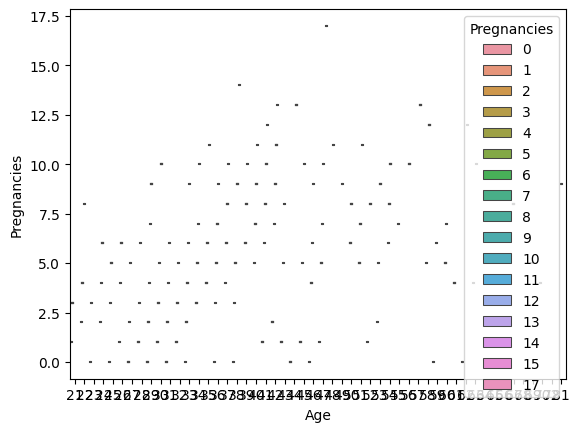

In [37]:
# hue fonksiyonu kullanarak yoğunluk ekleyebiliriz.
sns.boxplot(x ="Age", y ="Pregnancies", hue ="Pregnancies", data =df);

In [38]:
df.groupby(["Age","Pregnancies"])["Outcome"].mean()

Age  Pregnancies
21   0              0.142857
     1              0.043478
     2              0.071429
     3              0.000000
     4              0.000000
                      ...   
68   8              0.000000
69   5              0.000000
70   4              1.000000
72   2              0.000000
81   9              0.000000
Name: Outcome, Length: 292, dtype: float64

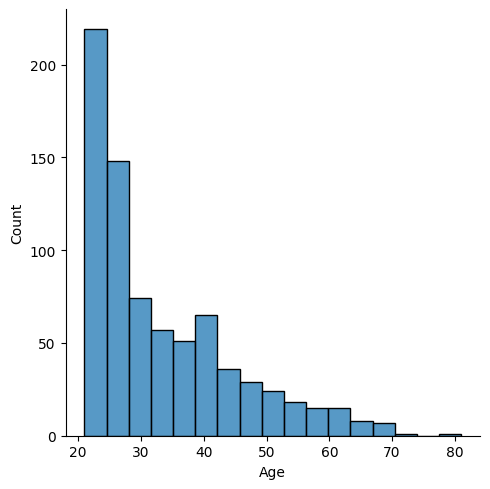

In [41]:
#Histogram grafiği oluşturma;
sns.displot(df.Age, kde = False);

C:\Users\nurcu\AppData\Local\Temp\ipykernel_10496\2464504368.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Age, shade = True);


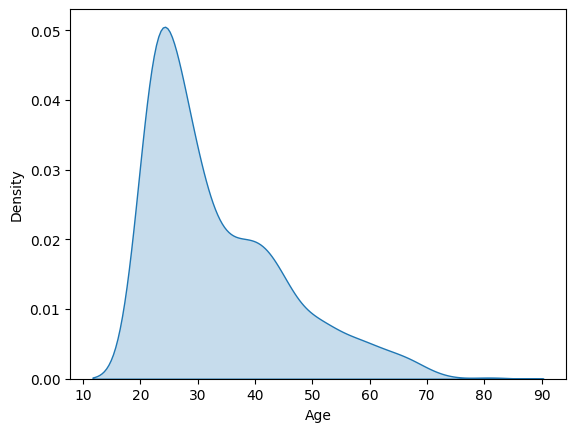

In [42]:
#Yoğunluk grafiği oluşturma;
sns.kdeplot(df.Age, shade = True);

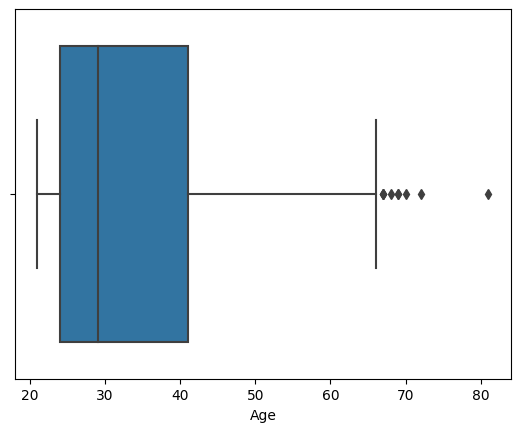

In [43]:
#Yatay kutu grafik oluşturma;
sns.boxplot(x =df["Age"]);

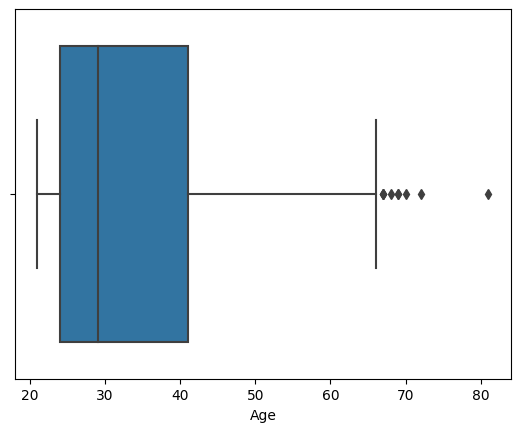

In [47]:
#Dikey kutu grafik oluşturma;
sns.boxplot(x = df["Age"], orient = "V");

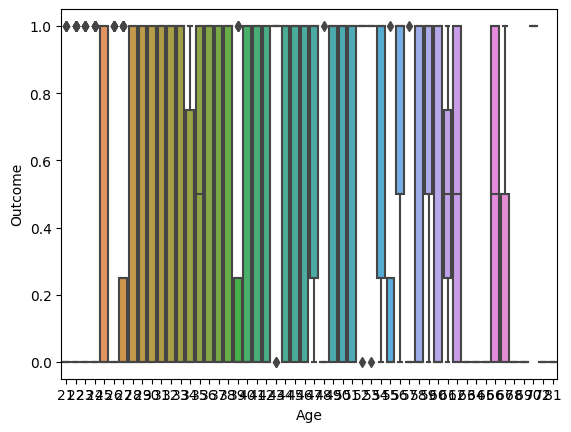

In [48]:
sns.boxplot(x ="Age", y ="Outcome", data =df);

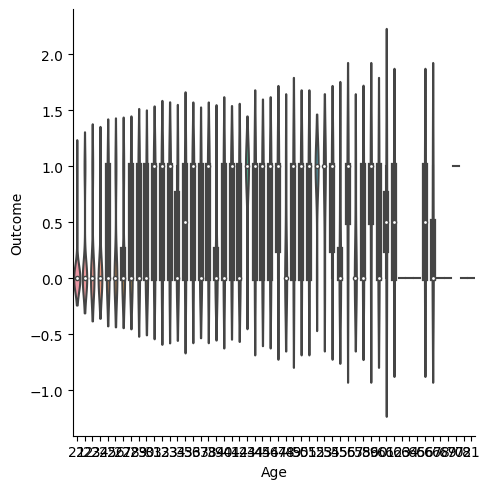

In [49]:
#Violin grafik oluşturma;
sns.catplot(x ="Age", y ="Outcome", kind = "violin", data =df);

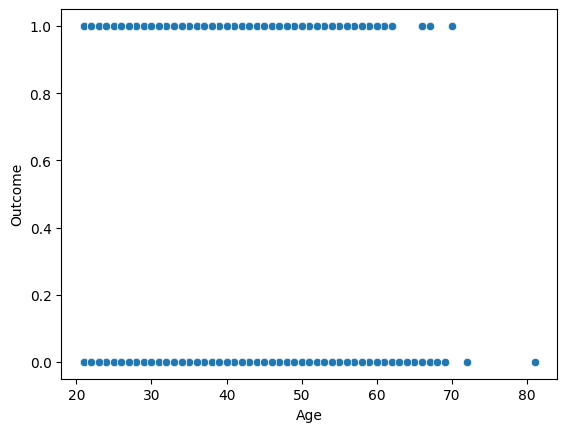

In [50]:
#Korelasyon grafiği oluşturma;
sns.scatterplot(x ="Age", y ="Outcome",data =df);

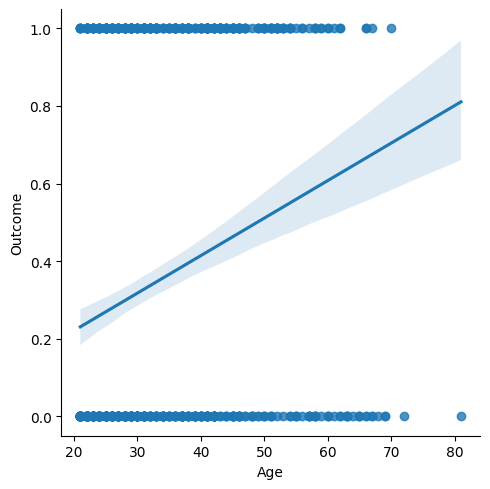

In [51]:
#Lineer grafiği oluşturma;
sns.lmplot(x ="Age", y ="Outcome", data =df);

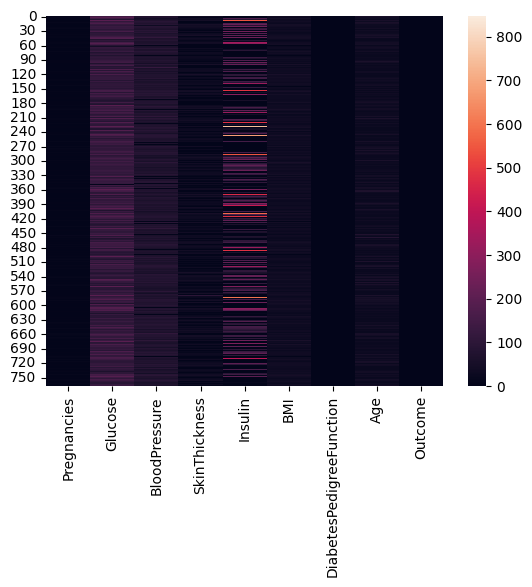

In [52]:
#Isı grafiği oluşturma;
sns.heatmap(df);

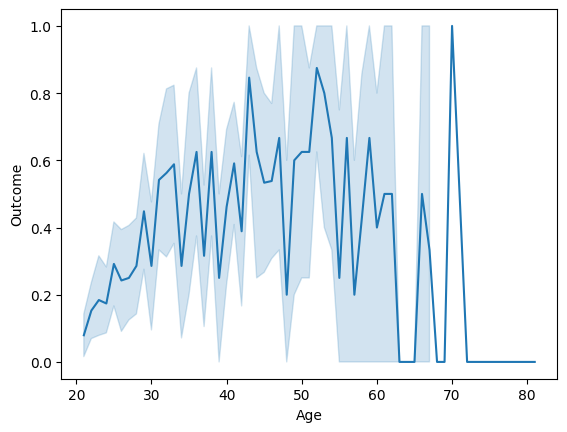

In [55]:
#Çizgi grafiği oluşturma;
sns.lineplot(x="Age", y="Outcome", data = df);

In [57]:
#Veri görselleştirmede en son olarak pivot tabloyuda kullanalım.
df.groupby(["Age","Insulin"])[["Outcome"]].aggregate("mean").unstack()

Outcome                                               ...            \
Insulin       0    14   15   16   18   22   23   25   29   32   ...  495  510   
Age                                                             ...             
21       0.107143  NaN  NaN  NaN  0.0  NaN  0.0  0.0  NaN  NaN  ...  NaN  NaN   
22       0.206897  NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN  0.0  ...  NaN  NaN   
23       0.400000  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
24       0.133333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
25       0.277778  1.0  NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
26       0.333333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  1.0   
27       0.277778  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
28       0.214286  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
29       0.333333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
30       0.272727  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  ...  NaN  NaN   
31       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
32       0.600000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
33       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
34       0.333333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
35       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
36       0.555556  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
37       0.363636  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
38       0.615385  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
39       0.400000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
40       0.428571  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
41       0.588235  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
42       0.363636  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
43       1.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  ...  NaN  NaN   
44       0.571429  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
45       0.545455  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
46       0.428571  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  NaN   
47       0.666667  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
48       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
49       1.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
50       0.666667  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
51       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
52       0.833333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
53       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
54       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
55       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
56       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
57       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
58       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
59       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
60       0.333333  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  NaN   
61       1.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
62       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
63       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
64       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
65       0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
66       0.500000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
67       0.333333  NaN  NaN  NaN  NaN  Na

Verimizin ortalamasına standart sapmasına bakmak istersek;

In [58]:
#ortalama;
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [59]:
#Sayma fonksiyonu;
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [60]:
#medyanı bulma;
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [61]:
#maksimum değer;
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [62]:
#minumum değer;
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [63]:
#standart sapma
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [64]:
#Varyans hesaplama;
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

Buraya kadar okuduğunuz için teşekkür ederim.

@nursenabozdag